# Problem Statement
In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

# Data Description :
    
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
    
    
    
Here are some selected columns from the data:
* player - name of the player
* pos - the position of the player
* g - number of games the player was in
* gs - number of games the player started
* pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [6]:
with open("nba.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

# SUMMARY STATISTICS

In [52]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [19]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

#### Check for null values in the dataframe

In [8]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [15]:
nba[nba['x3p.'].isnull()].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,...,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,...,23,38,2,3,12,3,17,28,2013-2014,2013


In [22]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [53]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

#### Note
Since there is no variation in data for features season and season_end so it will have no impact in making predictions.
Hence removing these features from the feature list

#### retrieve features having datatype as Object

In [28]:
feat_list_obj = []
for i in nba.columns:
    if nba[i].dtype == 'object':
        feat_list_obj.append(i)

In [29]:
feat_list_obj

['player', 'pos', 'bref_team_id', 'season']

In [ ]:
# prepare the list of features to be dropped from the Features to be used to train the model

In [62]:
feat_drop_list = feat_list_obj + ['season_end','pts']
feat_drop_list

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [63]:
Features = nba.drop(feat_drop_list,axis=1)
Labels = nba['pts'] #### to make predictions for pts hence used as label
print(Features.shape)
print(Labels.shape)

(481, 25)
(481,)


In [64]:
Features.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
dtype: int64

# DATA IMPUTATION

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We have replaced missing values with corresponding feature's median value.

In [65]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(Features) ####--> Independent Variable
Y = Labels.values ####---> Dependent Values

In [66]:
Features.shape,X.shape,Y.shape

((481, 25), (481, 25), (481,))

# DATA VISUALIZATION

In [67]:
Sample = Features.dropna()

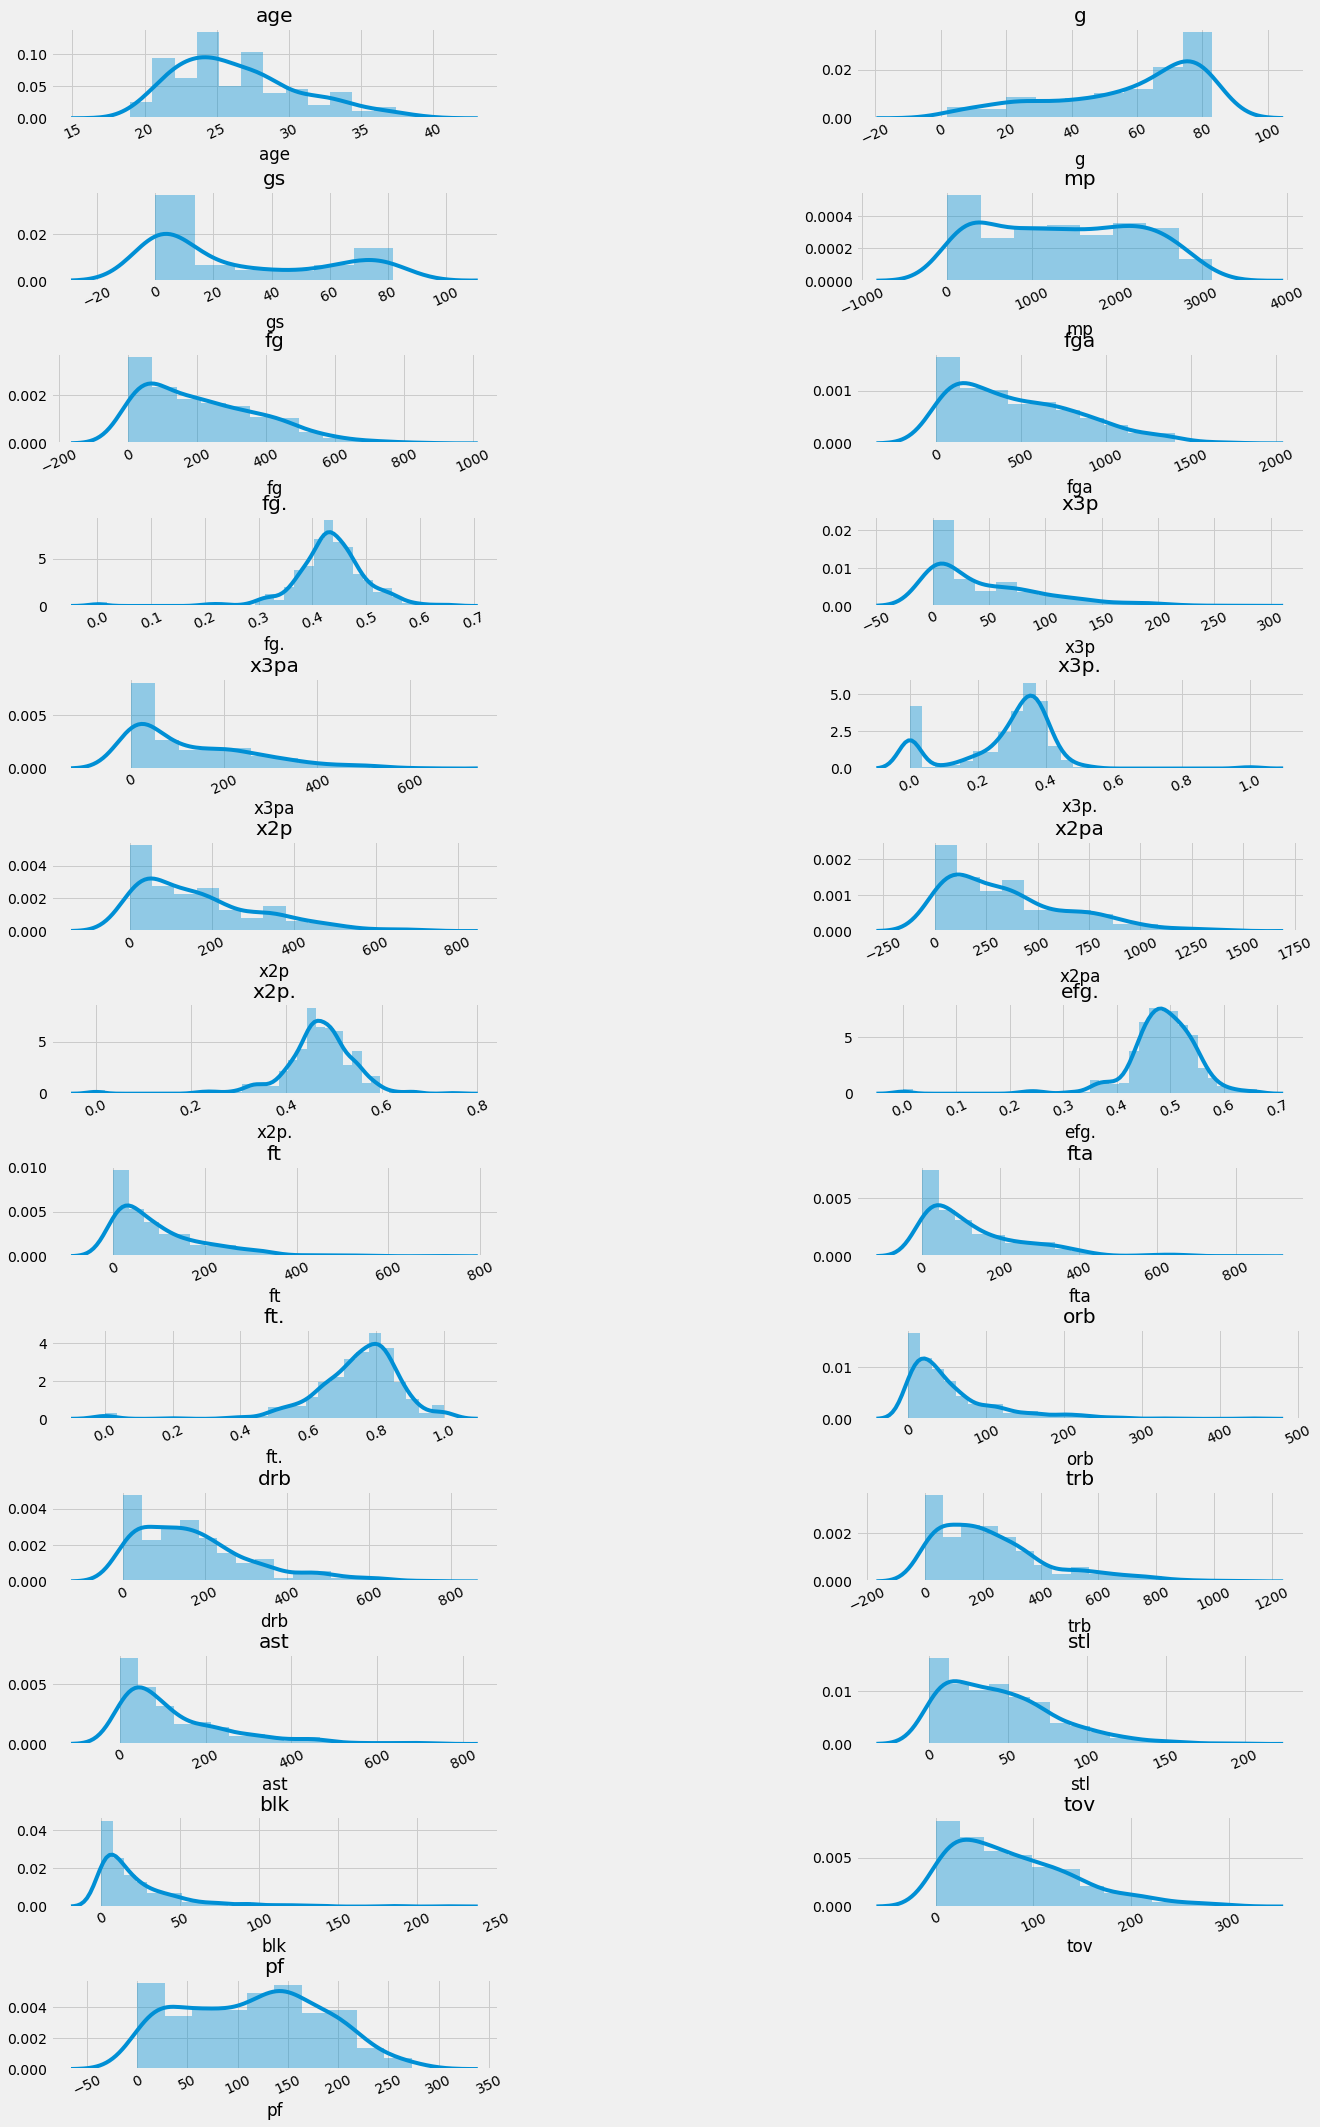

In [68]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            #plt.show()
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            #plt.show()
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

# TEST TRAIN SPLIT the sample data

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(384, 25)
(97, 25)
(384,)
(97,)


In [92]:
sns.set_style('whitegrid')
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value )
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
       

RMSE is  109.6853043  for K-Value: 1
RMSE is  94.7129276276  for K-Value: 2
RMSE is  97.6252741767  for K-Value: 3
RMSE is  96.146758125  for K-Value: 4
RMSE is  83.2992271099  for K-Value: 5
RMSE is  83.0387801177  for K-Value: 6
RMSE is  88.7759207605  for K-Value: 7
RMSE is  94.6633524124  for K-Value: 8
RMSE is  97.9693160672  for K-Value: 9
RMSE is  103.497404719  for K-Value: 10
RMSE is  106.195037355  for K-Value: 11
RMSE is  109.187399332  for K-Value: 12
RMSE is  107.774540372  for K-Value: 13
RMSE is  111.397467431  for K-Value: 14
RMSE is  114.830739127  for K-Value: 15
RMSE is  117.521060332  for K-Value: 16
RMSE is  120.392432702  for K-Value: 17
RMSE is  121.85591429  for K-Value: 18
RMSE is  123.263257285  for K-Value: 19
RMSE is  126.479123313  for K-Value: 20


#### Note
It shows that we are get less error for values of  K = 5,6 .

In [113]:
K_value = 6
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train, Y_train) 
Y_pred = neigh.predict(X_test)
print("RMSE for KNN Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
print("R Squared for KNN Regressor is ",r2_score(Y_test,Y_pred))

RMSE for KNN Regressor is  83.0387801177  for K-Value: 6
R Squared for KNN Regressor is  0.974834237452


#### R Squared is a statistical measure of how close the data points are to thr fitted regression line.

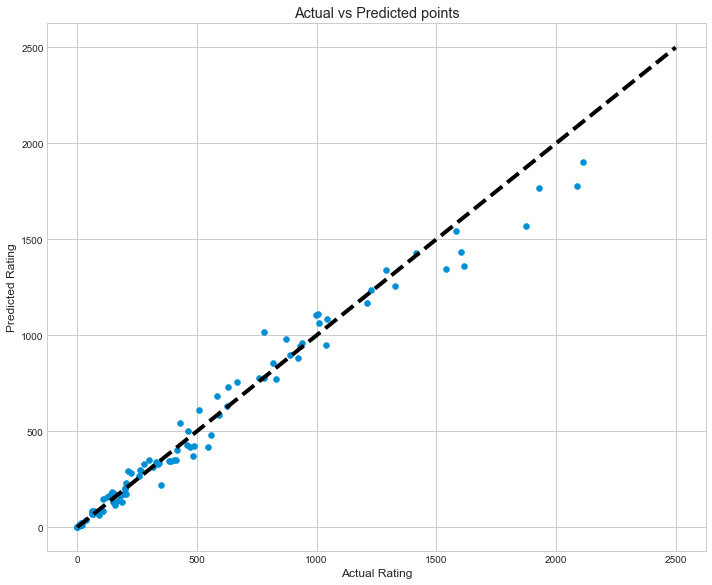

In [111]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")

# Applying Random Forest Regressor to predict NBA players score

In [112]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=1)
RFreg.fit(X_train,Y_train)
Y_pred = RFreg.predict(X_test)
print("RMSE for Random Forest Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test)))
print("R Squared for Random Forest Regressor is ",r2_score(Y_test,Y_pred))

RMSE for Random Forest Regressor is  47.1945873185
R Squared for Random Forest Regressor is  0.991871085435


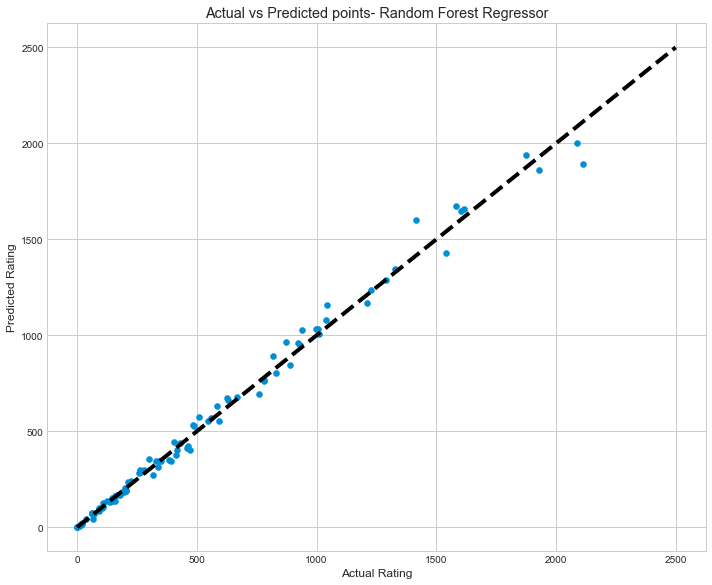

In [104]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points- Random Forest Regressor")

In [105]:
for depth in range(30):
    depth = depth + 1
    RFreg = RandomForestRegressor(max_depth=depth,random_state=1)
    RFreg.fit(X_train,Y_train)
    Y_pred = RFreg.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for max_depth ",depth)

RMSE is  283.581572914  for max_depth  1
RMSE is  149.259285201  for max_depth  2
RMSE is  77.1824406908  for max_depth  3
RMSE is  67.9941941451  for max_depth  4
RMSE is  49.9150514771  for max_depth  5
RMSE is  49.1093129792  for max_depth  6
RMSE is  55.870738379  for max_depth  7
RMSE is  45.1207343512  for max_depth  8
RMSE is  55.0563176769  for max_depth  9
RMSE is  41.5112052433  for max_depth  10
RMSE is  49.4566266286  for max_depth  11
RMSE is  42.4083584448  for max_depth  12
RMSE is  47.1945873185  for max_depth  13
RMSE is  47.1945873185  for max_depth  14
RMSE is  47.1945873185  for max_depth  15
RMSE is  47.1945873185  for max_depth  16
RMSE is  47.1945873185  for max_depth  17
RMSE is  47.1945873185  for max_depth  18
RMSE is  47.1945873185  for max_depth  19
RMSE is  47.1945873185  for max_depth  20
RMSE is  47.1945873185  for max_depth  21
RMSE is  47.1945873185  for max_depth  22
RMSE is  47.1945873185  for max_depth  23
RMSE is  47.1945873185  for max_depth  24
RM

#### Note 
The random forest regressor gives a low RMSE value for maxdepth = 13 and the RMSE remains constant aftermath.

# CONCLUSION

* The R Squared for KNN Regressor is  0.974834237452
* The R Squared for Random Forest Regressor is  0.991871085435

R Squared is a statistical measure of how close the sample data points are to the fitted regression line.

As also evident from the plot Random Forest Regressor gives a better prediction for the NBA players score as the data point are more fitted to the regression line compared to that of KNN Regressor.
